In [64]:
# User_ID	User ID
# Product_ID	Product ID
# Gender	Sex of User
# Age	Age in bins
# Occupation	Occupation (Masked)
# City_Category	Category of the City (A,B,C)
# Stay_In_Current_City_Years	Number of years stay in current city
# Marital_Status	Marital Status
# Product_Category_1	Product Category (Masked)
# Product_Category_2	Product may belongs to other category also (Masked)
# Product_Category_3	Product may belongs to other category also (Masked)
# Purchase	Purchase Amount (Target Variable)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats
from scipy.stats import norm
from scipy import stats
from scipy.stats import norm

In [2]:
data_train=pd.read_csv("data/train.csv")
data_test=pd.read_csv("data/test.csv")
labels_train=data_train['Purchase']
all_data=data_train.append(data_test)

In [3]:
all_data

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002
5,26-35,A,M,0,15,1,2.0,NaN,P00193542,15227.0,3,1000003
6,46-50,B,M,1,7,1,8.0,17.0,P00184942,19215.0,2,1000004
7,46-50,B,M,1,7,1,15.0,NaN,P00346142,15854.0,2,1000004
8,46-50,B,M,1,7,1,16.0,NaN,P0097242,15686.0,2,1000004
9,26-35,A,M,1,20,8,NaN,NaN,P00274942,7871.0,1,1000005


In [4]:
all_data.describe()

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000,7.836670e+05
mean,0.409777,8.079300,5.366196,9.844506,12.668605,9263.968713,1.003029e+06
std,0.491793,6.522206,3.878160,5.089093,4.125510,5023.065394,1.727267e+03
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,1.000001e+06
25%,0.000000,2.000000,1.000000,5.000000,9.000000,5823.000000,1.001519e+06
50%,0.000000,7.000000,5.000000,9.000000,14.000000,8047.000000,1.003075e+06
75%,1.000000,14.000000,8.000000,15.000000,16.000000,12054.000000,1.004478e+06
max,1.000000,20.000000,20.000000,18.000000,18.000000,23961.000000,1.006040e+06


In [4]:
all_data.columns[all_data.isnull().any()]

Index([u'Product_Category_2', u'Product_Category_3', u'Purchase'], dtype='object')

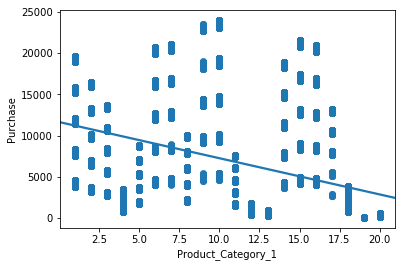

In [112]:
sns.regplot(all_data['Product_Category_1'], all_data['Purchase']) 

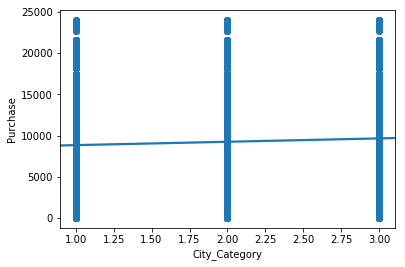

In [154]:
sns.regplot(all_data['City_Category'].replace({'A':1,'B':2,'C':3}), all_data['Purchase']) 

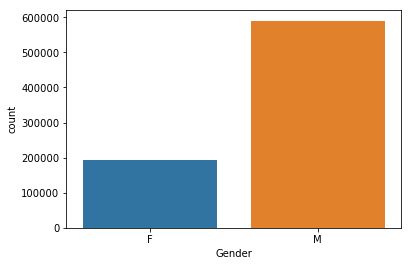

In [37]:
sns.countplot(all_data['Gender'])

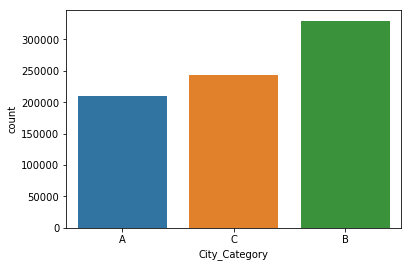

In [38]:
sns.countplot(all_data['City_Category'])

In [39]:
all_data['Product_ID'].value_counts()

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
P00057642    2079
P00184942    2066
P00058042    2014
P00237542    1999
P00145042    1991
P00117942    1985
P00110942    1976
P00059442    1949
P00010742    1922
P00255842    1914
P00110842    1834
P00220442    1833
P00051442    1794
P00117442    1785
P00102642    1782
P00242742    1774
P00148642    1758
P00031042    1737
P00278642    1735
P00080342    1719
P00028842    1713
P00034742    1690
P00251242    1682
P00114942    1673
P00000142    1636
             ... 
P00083542       1
P00091542       1
P00203942       1
P00208642       1
P00013442       1
P00329842       1
P00062342       1
P00100242       1
P00268942       1
P00092742       1
P00270342       1
P00308042       1
P00185942       1
P00061642       1
P00104342       1
P00206542       1
P00298342       1
P00306542       1
P00106242       1
P00203242       1
P00156642       1
P00336842       1
P00106342       1
P00253842       1
P00081342 

In [5]:
numeric=all_data.select_dtypes(include=[np.number])
categoric=all_data.select_dtypes(exclude=[np.number])

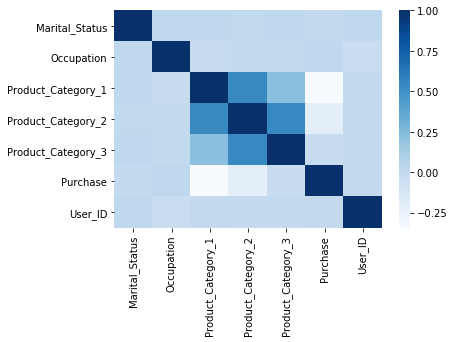

In [6]:
corr_matrix=numeric.corr()
sns.heatmap(corr_matrix, cmap="Blues")

In [7]:
numeric

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID
0,0,10,3,NaN,NaN,8370.0,1000001
1,0,10,1,6.0,14.0,15200.0,1000001
2,0,10,12,NaN,NaN,1422.0,1000001
3,0,10,12,14.0,NaN,1057.0,1000001
4,0,16,8,NaN,NaN,7969.0,1000002
5,0,15,1,2.0,NaN,15227.0,1000003
6,1,7,1,8.0,17.0,19215.0,1000004
7,1,7,1,15.0,NaN,15854.0,1000004
8,1,7,1,16.0,NaN,15686.0,1000004
9,1,20,8,NaN,NaN,7871.0,1000005


In [8]:
all_data['Product_Category_1'].fillna(0, inplace=True)
all_data['Product_Category_2'].fillna(0, inplace=True)
all_data['Product_Category_3'].fillna(0, inplace=True)

In [9]:
all_data.columns[all_data.isnull().any()]

Index([u'Purchase'], dtype='object')

In [10]:
all_data['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [11]:
all_data.columns

Index([u'Age', u'City_Category', u'Gender', u'Marital_Status', u'Occupation',
       u'Product_Category_1', u'Product_Category_2', u'Product_Category_3',
       u'Product_ID', u'Purchase', u'Stay_In_Current_City_Years', u'User_ID'],
      dtype='object')

In [12]:
all_data['Marital_Status'].value_counts()

0    462538
1    321129
Name: Marital_Status, dtype: int64

In [13]:
all_data.columns[all_data.isnull().any()]

Index([u'Purchase'], dtype='object')

In [14]:
data_test.shape

(233599, 11)

In [15]:
data_train.shape

(550068, 12)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def factorize(data, var, fill_na = None):
      if fill_na is not None:
            data[var].fillna(fill_na, inplace=True)
      le.fit(data[var])
      data[var] = le.transform(data[var])
      return data
all_data = factorize(all_data, "City_Category")
all_data = factorize(all_data, "Gender")
all_data['Product_ID']=all_data['Product_ID'].apply(lambda x: x[1:])

In [17]:
all_data['Age']=all_data['Age'].replace({'0-17':15,'18-25':22,'26-35':29,'36-45':40,'46-50':48,'51-55':53,'55+':65}) 
all_data['Stay_In_Current_City_Years']=all_data['Stay_In_Current_City_Years'].replace({'4+':6})

In [18]:

y=data_train['Purchase']
del all_data['Purchase']


X=all_data.iloc[:550068, :]
X_test=all_data.iloc[550068:, :]

In [19]:
X.dtypes

Age                             int64
City_Category                   int64
Gender                          int64
Marital_Status                  int64
Occupation                      int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Product_ID                     object
Stay_In_Current_City_Years     object
User_ID                         int64
dtype: object

In [20]:
y.dtypes

dtype('int64')

In [21]:
def onehot(onehot_df, df, column_name, fill_na):
       onehot_df[column_name] = df[column_name]
       if fill_na is not None:
            onehot_df[column_name].fillna(fill_na, inplace=True)

       dummies = pd.get_dummies(onehot_df[column_name], prefix="_"+column_name)
       onehot_df = onehot_df.join(dummies)
       onehot_df = onehot_df.drop([column_name], axis=1)
       return onehot_df

In [22]:
del all_data['User_ID']
del all_data['Product_ID']

In [23]:
X=all_data.iloc[:550068, :]
X_test=all_data.iloc[550068:, :]

In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
ypred=lr.predict(X_test)

In [26]:
ypred

array([ 10534.92796622,   9941.62480479,   8596.3024048 , ...,
        11549.25840795,   7334.24617894,   8920.60927327])

In [27]:
y_pred=pd.DataFrame(ypred)
writer = pd.ExcelWriter('output.xlsx')
y_pred.to_excel(writer,'Sheet1')
writer.save()

In [28]:
print(123)

123


In [29]:
from xgboost import XGBRegressor

In [30]:
del X['Product_ID']

KeyError: 'Product_ID'

In [ ]:
del X_test['Product_ID']

In [ ]:
X['Stay_In_Current_City_Years']=X['Stay_In_Current_City_Years'].astype('float')
X_test['Stay_In_Current_City_Years']=X_test['Stay_In_Current_City_Years'].astype('float')

In [20]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X, y)
ypred=xgb.predict(X_test)
y_pred=pd.DataFrame(ypred)
writer = pd.ExcelWriter('outputrfr.xlsx')
y_pred.to_excel(writer,'Sheet1')
writer.save()

In [187]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
from sklearn.ensemble import AdaBoostRegressor

rfr=AdaBoostRegressor(n_estimators=50, learning_rate=0.8)
rfr.fit(X, y)

AdaBoostRegressor(base_estimator=None, learning_rate=0.8, loss='linear',
         n_estimators=50, random_state=None)

In [33]:
ypred=rfr.predict(X_test)
y_pred=pd.DataFrame(ypred)
writer = pd.ExcelWriter('outputrfr.xlsx')
y_pred.to_excel(writer,'Sheet1')
writer.save()

In [36]:
ypred.shape

(233599,)

In [191]:
X_test


,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Stay_In_Current_City_Years
0,5,1,1,1,7,1,11.0,0.0,00128942,2
1,3,2,1,0,17,3,5.0,0.0,00113442,0
2,4,1,0,1,1,5,14.0,0.0,00288442,6
3,4,1,0,1,1,4,9.0,0.0,00145342,6
4,3,2,0,0,1,4,5.0,12.0,00053842,1
5,5,2,1,1,1,2,3.0,15.0,00350442,3
6,5,2,1,1,1,1,11.0,15.0,00155442,3
7,5,2,1,1,1,2,4.0,9.0,0094542,3
8,3,0,1,0,7,10,13.0,16.0,00161842,1
9,2,0,1,0,15,5,14.0,0.0,00067942,6
